## Research Questions: 
- Does the amount of advertising for cigarettes have any effect on the production levels of tabacco?
- How does consumption of tabacco related to tobacco production and/or cigarette advertising?
- How does cigarette advertising relate to production and type of product being consumed?
- How has the invention and popularization of e-cigarettes affected advertising, production, and consumption of tobacco? 

## Data Collection and Cleaning 

For the dataset on cigarette advertising from 2018 to 2020, we got the raw data in form of an excel spreadsheet. We downloaded this as a csv file. We then renamed the columns, dropped empty rows, and changed the numbers to have no commas in them. We also converted the column of advertising spending to numeric values so it would be easier to do analysis on it. 

For the dataset on tobacco production from 2000 to 2019, we got the raw data in an excel spreadsheet and downloaded it as a csv file. To clean the data we renamed the columns, dropped empty rows, and got rid of the commas in the numbers. Additionally we converted the column of tobacco production to integers and then multiplied them all by 1000 because the data was orginally given in tobacco production (in 1000 pounds). 

For the dataset on cigarette advertising as a percent of sales from 2011 to 2015 again we got the raw data in an excel spreadsheet and downloaded it as a csv file. Similarly, we renamed the columns, dropped empty rows, and got rid of the column that was just "in %" for each row. 


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ads18 = pd.read_csv('ads2018to2020.csv')
ads18.columns = ['Year', "US Cigarettes Ad Spending (in millions)"]
ads18 = ads18.drop([0,1])
ads18["US Cigarettes Ad Spending (in millions)"]=ads18["US Cigarettes Ad Spending (in millions)"].str.replace(',','')
ads18["US Cigarettes Ad Spending (in millions)"] = pd.to_numeric(ads18["US Cigarettes Ad Spending (in millions)"])
print(ads18)

    Year  US Cigarettes Ad Spending (in millions)
2   2018                                  1683.05
3  2019*                                  2959.90
4  2020*                                  4275.66


In [11]:
tproduction = pd.read_csv('tobaccoproduction.csv')
tproduction.columns = ['Year', 'Tobacco Production']
tproduction = tproduction.drop([0,1])
tproduction["Tobacco Production"] = tproduction["Tobacco Production"].str.replace(',','')
tproduction["Tobacco Production"] = pd.to_numeric(tproduction["Tobacco Production"])
tproduction["Tobacco Production"] = tproduction["Tobacco Production"] * 1000
print(tproduction)

    Year  Tobacco Production
2   2000          1053264000
3   2001           991293000
4   2002           871122000
5   2003           802560000
6   2004           881875000
7   2005           645015000
8   2006           727897000
9   2007           787653000
10  2008           800504000
11  2009           822581000
12  2010           718190000
13  2011           598252000
14  2012           762709000
15  2013           723579000
16  2014           876415000
17  2015           719171000
18  2016           628720000
19  2017           710161000
20  2018           533241000
21  2019           467956000


In [12]:
ads11 = pd.read_csv('ads2011to2015.csv')
ads11 = ads11.drop([0,1])
ads11 = ads11.drop(["Unnamed: 2"], axis=1)
ads11.columns = ["Year", "Ad Spending as a Percent of Sales"]
print(ads11)

    Year  Ad Spending as a Percent of Sales
2   2011                                1.1
3   2012                                0.5
4   2013                                1.0
5   2014                                0.7
6  2015*                                0.7


In [31]:
consum = pd.read_csv('tobaccoconsumption.csv')
del consum['LocationAbbrev']
del consum['LocationDesc']
del consum['Population']
del consum['Domestic Per Capita']
del consum['Imports Per Capita']
del consum['Total Per Capita']
consum.columns = ['Year', 'Combustible', 'Type', 'Subtype', 'Unit', 'Domestic', 'Imports','Total']


convertcigs = 0.00203125;
convertcigars = 2*convertcigs;


#i cant figure this out bro, I tested it and its def going thru the if statement, I checked, its just not changing the values properly

for i in range(0,len(consum)):
    if(consum.loc[i]['Unit']=='Cigarette Equivalents' or consum.loc[i]['Unit']=='Cigarettes'):
        consum.loc[i]['Domestic'] = consum.loc[i]['Domestic']*convertcigs
        consum.loc[i]['Imports'] = consum.loc[i]['Imports']*convertcigs
        consum.loc[i]['Total'] = consum.loc[i]['Total']*convertcigs
    if(consum.loc[i]['Unit']=='Cigars'):
        consum.loc[i]['Domestic'] = consum.loc[i]['Domestic']*convertcigars
        consum.loc[i]['Imports'] = consum.loc[i]['Imports']*convertcigars
        consum.loc[i]['Total'] = consum.loc[i]['Total']*convertcigars
print(consum)



     Year             Combustible               Type  \
0    2000  Noncombustible Tobacco  Smokeless Tobacco   
1    2000     Combustible Tobacco         Cigarettes   
2    2000     Combustible Tobacco             Cigars   
3    2000     Combustible Tobacco      Loose Tobacco   
4    2000     Combustible Tobacco      Loose Tobacco   
..    ...                     ...                ...   
242  2018     Combustible Tobacco      Loose Tobacco   
243  2018     Combustible Tobacco   All Combustibles   
244  2018     Combustible Tobacco             Cigars   
245  2018     Combustible Tobacco      Loose Tobacco   
246  2018     Combustible Tobacco      Loose Tobacco   

                       Subtype                   Unit      Domestic  \
0              Chewing Tobacco                 Pounds      45502156   
1           Cigarette Removals             Cigarettes  423250355675   
2                 Total Cigars                 Cigars    5612867329   
3          Total Loose Tobacco  Cigarette E

<ipython-input-31-51e60cee2a41>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consum.loc[i]['Domestic'] = consum.loc[i]['Domestic']*convertcigars
<ipython-input-31-51e60cee2a41>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consum.loc[i]['Imports'] = consum.loc[i]['Imports']*convertcigars
<ipython-input-31-51e60cee2a41>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consum.loc[i]['Total'] = consum.loc[i]['Total']*convertciga

## Data Description: 
We are using four different datasets.

The first is "Advertising spending as percent of sales in the cigarettes industry in the United States from 2011 to 2015". The observations(rows) are the years 2011 to 2015 with the attribute (column) being the amount spent on advertising as a percent of the sales in the cigarette industry. This data comes from the sources Schonfeld & Associates, a company that develops business information products. It is part of a larger report they did on "Advertising Ratios and Budgets", an annual report that covers over 2,400 companies and 320 industries advertising. We retrieved this data from the Statista website(https://www.statista.com/statistics/470970/ad-spend-to-sales-cigarettes-usa/). No people were involved in the survey. The numbers come from data on government filings and published financial reports. Single industry values, like the cigarette industry, are calculated using only the companies that participate, which varies from year to year. 

The second dataset we are using "Advertising spending in the cigarettes industry in the United States from 2018 to 2020". The observations(rows) are the yers 2018 to 2020 and the atrribute(column) is the amount spent in advertising in the cigarette industry in millions of dollars. This data originally also comes from Schonfeld & Associates in their "Advertising Ratios and Budgets 2019" report. We got the data from the Statista website at(https://www.statista.com/statistics/470438/cigarettes-industry-ad-spend-usa/). Since it comes from the same report as the previous dataset, everything is the same. 

The third is “Tobacco production in the US 2000-2019”, which compares Years and Tobacco production in the United States(in 1,000 pounds). The US Department of Agriculture and National Agricultural Statistics Service tracked tobacco production from 2000-2019 for economic and agricultural purposes. This was a fairly objective count of tobacco production by producers in the United States, presumably some of the numbers were rounded because producers are not weighing all of their stock but instead giving an accurate estimate. This also does not include people who produced tobacco for personal consumption, instead only including nationally recorded producers, however that quantity is likely so limited it is negligible. https://drive.google.com/file/d/1dEbS4yPHkGaO708Rrg7-yJP46DIHG13n/view?usp=sharing

Our final dataset “Adult tobacco consumption US 2000-present” which compares Year, LocationAbbr, LocationDesc, Population, Topic (combustible vs non), Measure (Type of tobacco product), Submeasure, Data Value Unit (pounds, cigarettes, cigars), Domestic, Imports, Total, Domestic Per Capita, Imports Per Capita, Total Per Capita. This was a data collection done by the CDC to look at trends in adult consumption of tobacco from 2000 to 2019, looking at trends in types of product and popularity. This was tracking sales of products in the US, which doesn’t account for certain recent trends in e-cigarettes and fraudulent product sale, reselling, and product tampering.
https://drive.google.com/file/d/1k_HeYpnjt_umH8DpaAWYCDU8o7BM22EJ/view?usp=sharing




## Data Limitations:

For the data on cigarette advertising from 2011 to 2015 there are a few important limitations to be noted. First off, the data for 2015 is a projected value. The survey was form 2011 to 2014, so the 2015 data point is just a forecast. Secondly, the data only includes companies that participated in the survey. This creates a potential for a lack of trust in this data. We don't know how Schonfeld & Associates conducted the survery or how they got companies to participate. It's possible they were only looking at a particular set of companies or that the companies that did agree do not represent the entire cigarette industry. It mentions that the companies that participate varies from year to year, so there could be reasons for any trend that have to do with what companies participated. This also makes the 2015 data point extra unreliable because they didn't knwo at the time which companies were going to participate in 2015. 

Because the data on cigarette advertising from 2018 to 2020 comes from the same Schonfeld & Associates report, it has all of the same limitations. In this case, 2019 and 2020 are predicted. Since there are only three datapoints, having two of them be forecast values and not actual values, definitely puts an extra limitation on what we can really use this dataset for. As explained earlier, the companies differ year to year, so any trend we see in this data may not be completely reliable. 

As for the production quantities, since it is just comparing US production to the year, it presents all available basic information.

With the consumption data set, it is not clear what tobacco products are e-cigarettes, since their popularity really exploded over the past five years and this data set starts 15 years before that boom, therefore the tobacco products are more focused on cigarettes, cigars, and loose tobacco instead of vapes and e-cigarettes. Additionally, the quantities are given in inconsistent units so while converting cigarettes and cigars to pounds of tobaccco loses some of the specificity of the data and otherwise the data would be incomparable.

## Exploratory Data Analysis

In [14]:
mean = tproduction['Tobacco Production'].mean()
median = tproduction['Tobacco Production'].median()
max = tproduction['Tobacco Production'].max()
index = tproduction[tproduction['Tobacco Production']==max].index.values[0]
maxyear = tproduction.loc[index,'Year']
min = tproduction['Tobacco Production'].min()
index2 = tproduction[tproduction['Tobacco Production']==min].index.values[0]
minyear = tproduction.loc[index2,'Year']
print("The mean tobacco production from 2000 to 2019 is {:.0f} pounds".format(mean))
print("The median tobacco production from 2000 to 2019 is {:.0f} pounds ".format(median))
print("The max tobacco production from 2000 to 2019 is {:.0f} pounds".format(max))
print("The max occured in " + maxyear)
print("The min tobacco production from 2000 to 2019 is {:.0f} pounds".format(min))
print("The max occured in " + minyear)

The mean tobacco production from 2000 to 2019 is 756107900 pounds
The median tobacco production from 2000 to 2019 is 745303000 pounds 
The max tobacco production from 2000 to 2019 is 1053264000 pounds
The max occured in 2000
The min tobacco production from 2000 to 2019 is 467956000 pounds
The max occured in 2019


In [15]:
mean = ads18["US Cigarettes Ad Spending (in millions)"].mean()
median = ads18["US Cigarettes Ad Spending (in millions)"].median()
max = ads18["US Cigarettes Ad Spending (in millions)"].max()
index = ads18[ads18["US Cigarettes Ad Spending (in millions)"]==max].index.values[0]
maxyear = ads18.loc[index,'Year']
min = ads18["US Cigarettes Ad Spending (in millions)"].min()
index2 = ads18[ads18["US Cigarettes Ad Spending (in millions)"]==min].index.values[0]
minyear = ads18.loc[index2,'Year']
print("The mean spent on cigarette advertisting from 2018 to 2020 is {:.0f} millions of dollars".format(mean))
print("The median spent on cigarette advertisting from 2018 to 2020 is {:.0f} millions of dollars".format(median))
print("The max spent on cigarette advertisting from 2018 to 2020 is {:.0f} millions of dollars".format(max))
print("The max occured in " + maxyear)
print("The min spent on cigarette advertisting from 2018 to 2020 is {:.0f} millions of dollars".format(min))
print("The max occured in " + minyear)

The mean spent on cigarette advertisting from 2018 to 2020 is 2973 millions of dollars
The median spent on cigarette advertisting from 2018 to 2020 is 2960 millions of dollars
The max spent on cigarette advertisting from 2018 to 2020 is 4276 millions of dollars
The max occured in 2020*
The min spent on cigarette advertisting from 2018 to 2020 is 1683 millions of dollars
The max occured in 2018


In [16]:
mean = ads11["Ad Spending as a Percent of Sales"].mean()
median = ads11["Ad Spending as a Percent of Sales"].median()
max = ads11["Ad Spending as a Percent of Sales"].max()
index = ads11[ads11["Ad Spending as a Percent of Sales"]==max].index.values[0]
maxyear = ads11.loc[index,'Year']
min = ads11["Ad Spending as a Percent of Sales"].min()
index2 = ads11[ads11["Ad Spending as a Percent of Sales"]==min].index.values[0]
minyear = ads11.loc[index2,'Year']
print("The mean percent of cigarette advertisting to sales from 2011 to 2019 is {:.2f}%".format(mean))
print("The median percent of cigarette advertisting to sales from 2011 to 2010 is {:.2f}%".format(median))
print("The max percent of cigarette advertisting to sales from 2011 to 2019 is {:.2f}%".format(max))
print("The max occured in " + maxyear)
print("The min percent of cigarette advertisting to sales from 2011 to 2019 is {:.2f}%".format(min))
print("The max occured in " + minyear)

The mean percent of cigarette advertisting to sales from 2011 to 2019 is 0.80%
The median percent of cigarette advertisting to sales from 2011 to 2010 is 0.70%
The max percent of cigarette advertisting to sales from 2011 to 2019 is 1.10%
The max occured in 2011
The min percent of cigarette advertisting to sales from 2011 to 2019 is 0.50%
The max occured in 2012


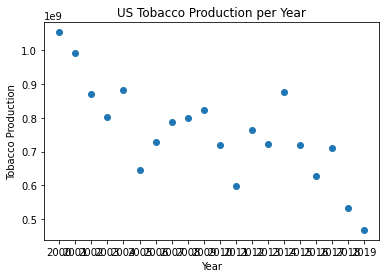

In [17]:
plt.scatter(tproduction["Year"], tproduction["Tobacco Production"])
plt.xlabel('Year')
plt.ylabel('Tobacco Production')
plt.title('US Tobacco Production per Year')
plt.show()

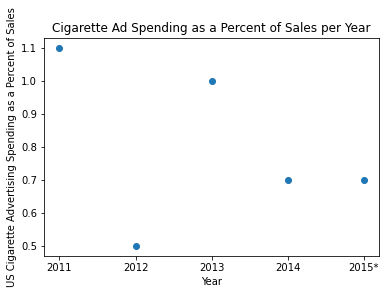

In [18]:
plt.scatter(ads11["Year"], ads11["Ad Spending as a Percent of Sales"])
plt.xlabel('Year')
plt.ylabel('US Cigarette Advertising Spending as a Percent of Sales')
plt.title('Cigarette Ad Spending as a Percent of Sales per Year')
plt.show()

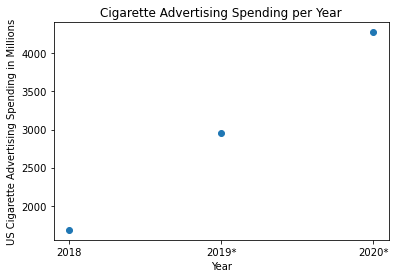

In [19]:
plt.scatter(ads18["Year"], ads18["US Cigarettes Ad Spending (in millions)"])
plt.xlabel('Year')
plt.ylabel('US Cigarette Advertising Spending in Millions')
plt.title('Cigarette Advertising Spending per Year')
plt.show()

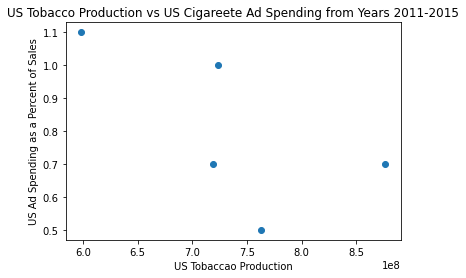

In [20]:
early = tproduction[11:16]
plt.scatter(early['Tobacco Production'], ads11["Ad Spending as a Percent of Sales"])
plt.xlabel('US Tobaccao Production')
plt.ylabel("US Ad Spending as a Percent of Sales")
plt.title("US Tobacco Production vs US Cigareete Ad Spending from Years 2011-2015")
plt.show()

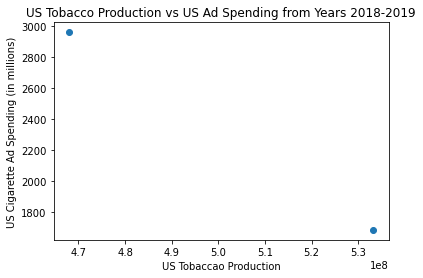

In [21]:
early = tproduction[18:20]
plt.scatter(early['Tobacco Production'], ads18["US Cigarettes Ad Spending (in millions)"][0:2])
plt.xlabel('US Tobaccao Production')
plt.ylabel("US Cigarette Ad Spending (in millions)")
plt.title("US Tobacco Production vs US Ad Spending from Years 2018-2019")
plt.show()

In [23]:
max = consum['Total'].max()
mean = consum['Total'].mean()
median = consum['Total'].median()
min = consum['Total'].min()
index = consum[consum['Total'] == max].index.values[0]
index2 = consum[consum['Total'] == min].index.values[0]
unit = consum.loc[index,'Unit']
unit2 = consum.loc[index2,'Unit']
maxY = consum.loc[index,'Year']
minY = consum.loc[index2,'Year']
print("Max total consumption: {} {}".format(max,unit) )
print("Year of max total consumption: {}".format(maxY) )
print("Min total consumption: {} {}".format(min,unit2) )
print("Year of min total consumption: {}".format(minY) )
print("Mean total consumption: {} {}".format(mean,unit))

Max total consumption: 450725147466 Cigarette Equivalents
Year of max total consumption: 2000
Min total consumption: 2094333 Pounds
Year of min total consumption: 2018
Mean total consumption: 56932125967.48583 Cigarette Equivalents


Text(0.5, 1.0, 'Consumption of Tobacco Products from 2000 to 2019')

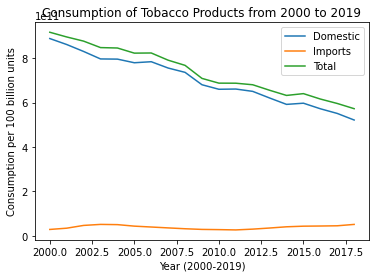

In [24]:
consum.groupby(['Year']).sum().plot()
plt.xlabel('Year (2000-2019)')
plt.ylabel('Consumption per 100 billion units')
plt.title('Consumption of Tobacco Products from 2000 to 2019')

/Users/blythedineen/opt/anaconda3/envs/info2950/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Consumption by Type')

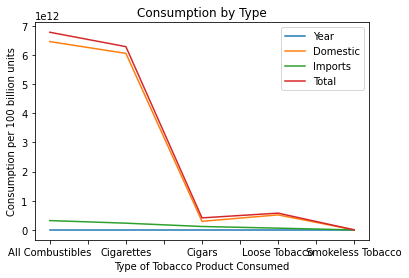

In [25]:
consum.groupby(['Type']).sum().plot()
plt.xlabel('Type of Tobacco Product Consumed')
plt.ylabel('Consumption per 100 billion units')
plt.title('Consumption by Type')